In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")


In [5]:
# Print the number of rows and columns in the dataset
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  645
Number of columns:  8


In [6]:
# Print the columns in the dataset
print("Columns: ", df.columns)

Columns:  Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')


In [7]:
# Print the data types of each column
print("Data Types: \n", df.dtypes)

Data Types: 
 Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object


In [8]:
# Print the description of the data
print(df.describe())

       Unnamed: 0         Sqft       Floor  TotalFloor     Bedroom  \
count  645.000000   645.000000  645.000000  645.000000  645.000000   
mean   325.159690  1527.656260    5.939535   10.855814    2.837209   
std    187.312152   767.386531    3.884721    4.996208    1.010740   
min      1.000000   359.358000    1.000000    1.000000    1.000000   
25%    164.000000   925.080000    3.000000    7.000000    2.000000   
50%    326.000000  1423.200000    5.000000   12.000000    3.000000   
75%    487.000000  1892.856000    8.000000   14.000000    4.000000   
max    648.000000  5856.468000   22.000000   38.000000    7.000000   

       Living.Room    Bathroom          Price  
count   645.000000  645.000000     645.000000  
mean      1.813953    1.810853   61986.823256  
std       0.462364    0.683574   35635.091007  
min       0.000000    0.000000    6100.000000  
25%       2.000000    1.000000   39000.000000  
50%       2.000000    2.000000   50000.000000  
75%       2.000000    2.000000   

In [9]:
# Print the number of missing values in each column
print("Missing Values: \n", df.isnull().sum())

Missing Values: 
 Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


In [11]:
# Get the first 5 rows of the dataset
print(df.head())

   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  


In [16]:
# Get the average, minimum, and maximum price of the houses
print('Average price:', df['Price'].mean())
print('Minimum price:', df['Price'].min())
print('Maximum price:', df['Price'].max())

Average price: 61986.82325581396
Minimum price: 6100
Maximum price: 250000


In [31]:
# display the average price of a house based on the number of bedrooms
print("Average price by bedroom: ", df.groupby("Bedroom")["Price"].mean())


Average price by bedroom:  Bedroom
1     35549.086957
2     47131.689441
3     65030.949791
4     77745.434783
5    117000.000000
6    180000.000000
7    180000.000000
Name: Price, dtype: float64


In [34]:
# display the average price of a house based on the number of bathrooms
print("Average price by bathroom: ", df.groupby("Bathroom")["Price"].mean())

Average price by bathroom:  Bathroom
0     85000.000000
1     37830.848485
2     65833.002591
3    107422.913043
4    150300.000000
5    137500.000000
Name: Price, dtype: float64


In [24]:
# display the average price of a house based on the number of floors
print("Average price by floor:")
print(df.groupby("Floor")["Price"].mean())

Average price by floor:
Floor
1      73545.454545
2      54537.135922
3      58099.753623
4      60879.906667
5      58042.704545
6      55841.480000
7      57899.952381
8      57611.083333
9      76846.076923
10     62784.852941
11     66657.631579
12     71573.538462
13     60821.428571
14     50166.666667
15    147500.000000
16    110000.000000
17     86500.000000
18     76166.666667
19    178571.428571
21    101750.000000
22     19000.000000
Name: Price, dtype: float64


In [35]:
# display the minimum and maximum price of a house based on the number of bedrooms
print("Min and max price by bedroom: ", df.groupby("Bedroom")["Price"].agg(["min", "max"]))

Min and max price by bedroom:              min     max
Bedroom                
1         13000   67000
2         11900  250000
3          6100  225000
4         30000  160000
5         55000  206000
6        180000  180000
7        180000  180000


In [36]:
# display the minimum and maximum price of a house based on the number of bathrooms
print("Min and max price by bathroom: ", df.groupby("Bathroom")["Price"].agg(["min", "max"]))

Min and max price by bathroom:               min     max
Bathroom                
0          85000   85000
1           6100   89000
2          21000  250000
3          42000  225000
4         100000  180000
5         120000  180000


In [37]:
# display the minimum and maximum price of a house based on the number of floors
print("Min and max price by floor: ", df.groupby("Floor")["Price"].agg(["min", "max"]))

Min and max price by floor:            min     max
Floor                
1       12000  180000
2       17000  180000
3       21000  225000
4        6100  185000
5       11900  150000
6       17000  168000
7       17000  180000
8       23000  150000
9       13000  206000
10      29999  100000
11      30500  150000
12      26000  123456
13      20000  250000
14      25000  135000
15     100000  200000
16      82000  138000
17      85000   88000
18      69500   89000
19     140000  200000
21      57000  145000
22      19000   19000


In [38]:
# display the count of houses in each price range
print("Count by price range: ", df["Price"].value_counts())

Count by price range:  45000     47
55000     29
36000     25
50000     22
100000    17
          ..
41999      1
23800      1
65999      1
67000      1
24800      1
Name: Price, Length: 153, dtype: int64


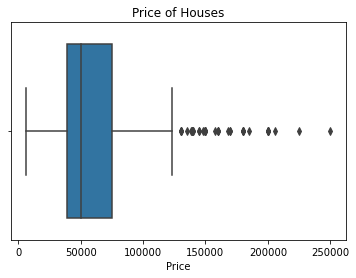

In [45]:
# visualize the price of the houses using a boxplot
sns.boxplot(x=df["Price"])
plt.xlabel("Price")
plt.title("Price of Houses")
plt.show()

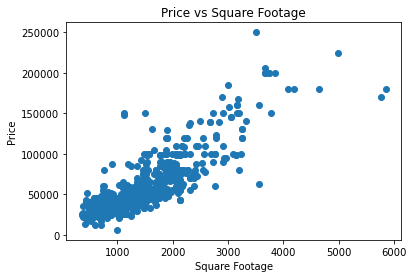

In [41]:
# plot a scatter plot of the price of the houses vs the square footage
plt.scatter(df["Sqft"], df["Price"])
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Price vs Square Footage")
plt.show()

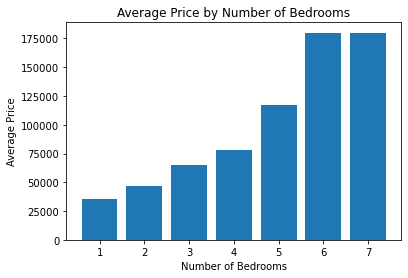

In [42]:
# plot a bar chart of the average price of a house based on the number of bedrooms
plt.bar(df.groupby("Bedroom")["Price"].mean().index, df.groupby("Bedroom")["Price"].mean().values)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.title("Average Price by Number of Bedrooms")
plt.show()

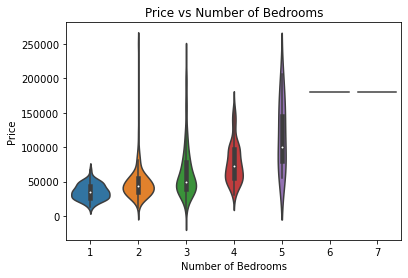

In [46]:
# visualize the relationship between price and number of bedrooms using a violin plot
sns.violinplot(x=df["Bedroom"], y=df["Price"])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price vs Number of Bedrooms")
plt.show()


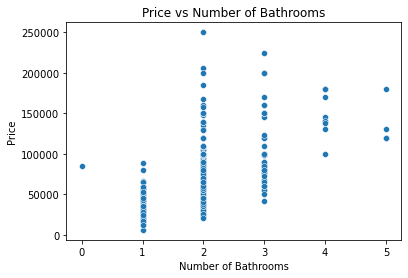

In [50]:
# visualize the relationship between price and number of bathrooms using a scatter plot
sns.scatterplot(x=df["Bathroom"], y=df["Price"])
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Price vs Number of Bathrooms")
plt.show()

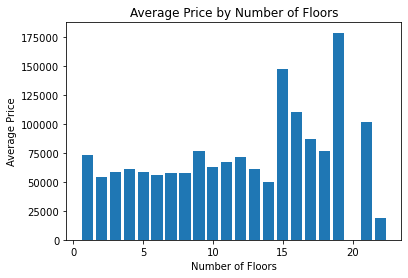

In [51]:
# visualize the relationship between price and number of floors using a bar chart
plt.bar(df.groupby("Floor")["Price"].mean().index, df.groupby("Floor")["Price"].mean().values)
plt.xlabel("Number of Floors")
plt.ylabel("Average Price")
plt.title("Average Price by Number of Floors")
plt.show()

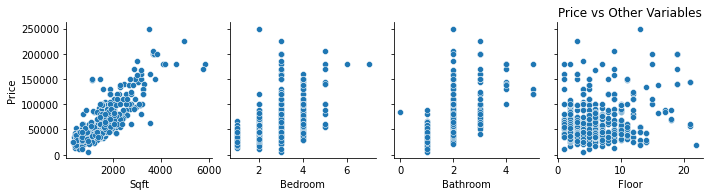

In [52]:
# visualize the relationship between price and the other variables using a pairplot
sns.pairplot(df, x_vars=["Sqft", "Bedroom", "Bathroom", "Floor"], y_vars=["Price"])
plt.title("Price vs Other Variables")
plt.show()

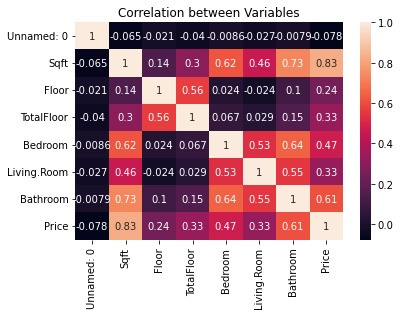

In [53]:
# visualize the correlation between the variables using a heatmap
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between Variables")
plt.show()

In [56]:
X = df[["Sqft","Floor","TotalFloor","Bedroom","Living.Room","Bathroom"]]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#verify the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (516, 6)
y_train shape: (516,)
X_test shape: (129, 6)
y_test shape: (129,)


In [62]:
print(X_train.head())
print(y_train.head())

         Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom
515  1487.244      6           7        3            1         2
29    853.920      6           7        2            1         1
274  1138.560      4           5        3            2         2
576   693.810      2           7        1            1         1
434  2910.444      4           7        3            2         3
515    36000
29     24028
274    26000
576    33000
434    90000
Name: Price, dtype: int64


In [63]:
print(df.isnull().sum())

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


In [64]:
# Save the training set
X_train.to_csv("train_data.csv", index=False)
y_train.to_csv("train_labels.csv", index=False)

# Save the testing set
X_test.to_csv("test_data.csv", index=False)
y_test.to_csv("test_labels.csv", index=False)

In [67]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [68]:
test_scores = []

In [70]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))

In [71]:
results = dict(zip(k_values, test_scores))

In [72]:
best_k = max(results, key=results.get)

print("The best value of k is: ", best_k)
print("The corresponding test score is: ", results[best_k])

The best value of k is:  7
The corresponding test score is:  0.735966176726123


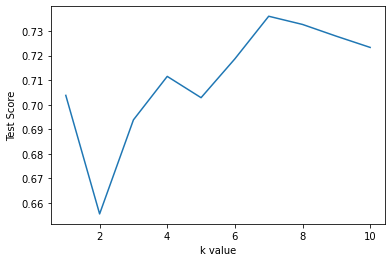

In [73]:
#visualize the relationship between k and test score
plt.plot(k_values, test_scores)
plt.xlabel("k value")
plt.ylabel("Test Score")
plt.show()